In [2]:
import ast
import pandas as pd
import seaborn as sns # New lib
from datasets import load_dataset
from matplotlib import pyplot as plt


# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) #str to date
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) #str to list to use explode 

# Updating Datasets
df['job_month_number'] = df['job_posted_date'].dt.month # create month number column

### BarChart

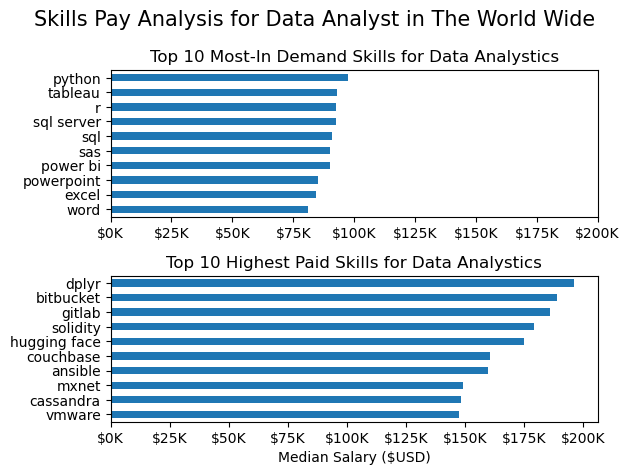

In [5]:
DA_USA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
DA_USA = DA_USA.explode('job_skills')
DA_USA = DA_USA.dropna(subset=['salary_year_avg'])
DA_USA.sample(2)
group = DA_USA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']) 
DemandSkills = group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)
HighstSkills = group.sort_values(by='median', ascending=False).head(10)
fig, ax = plt.subplots(2, 1)
DemandSkills[::-1].plot(kind='barh',y='median', ax=ax[0], title='Top 10 Most-In Demand Skills for Data Analystics', legend=False)
ax[0].set_ylabel('') # removing y label
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form
ax[0].set_xlim(0,200000)
HighstSkills[::-1].plot(kind='barh',y='median', ax=ax[1], title='Top 10 Highest Paid Skills for Data Analystics', xlabel='Median Salary ($USD)',legend=False)
ax[1].set_ylabel('') # removing y label
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form
fig.suptitle('Skills Pay Analysis for Data Analyst in The World Wide', fontsize=15)
fig.tight_layout() # fix the overlap
plt.show()

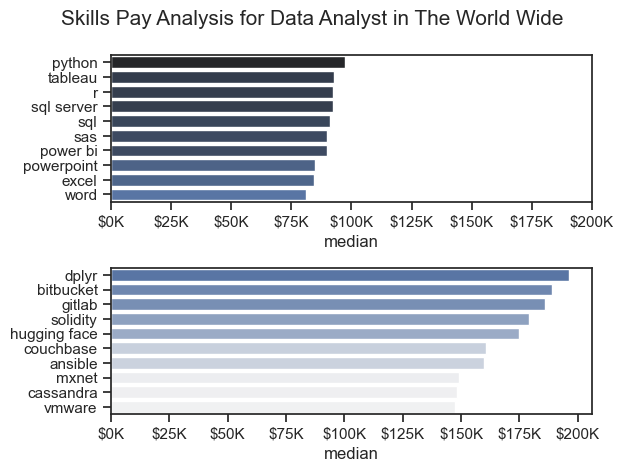

In [13]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style="ticks")

sns.barplot(data= DemandSkills, x='median', y=DemandSkills.index, hue='median', palette='dark:b_r' ,ax=ax[0])
# DemandSkills[::-1].plot(kind='barh',y='median', ax=ax[0], title='Top 10 Most-In Demand Skills for Data Analystics', legend=False)
ax[0].set_ylabel('') # removing y label
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form
ax[0].set_xlim(0,200000)
ax[0].legend().remove() # removing legend


sns.barplot(data= HighstSkills, x='median', y=HighstSkills.index, hue='median', palette='light:b', ax=ax[1])
# HighstSkills[::-1].plot(kind='barh',y='median', ax=ax[1], title='Top 10 Highest Paid Skills for Data Analystics', xlabel='Median Salary ($USD)',legend=False)
ax[1].set_ylabel('') # removing y label
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K')) #Format Salary form
ax[1].legend().remove()
fig.suptitle('Skills Pay Analysis for Data Analyst in The World Wide', fontsize=15)
fig.tight_layout() # fix the overlap
plt.show()


# hue is the column name that you want to color off of 
# palette = is the name of the color that yuo want darkLb darblue _r meanin inverse the color
# sns.set_theme(style="ticks") is important to make that color not shiny for the eyes

### Histogram

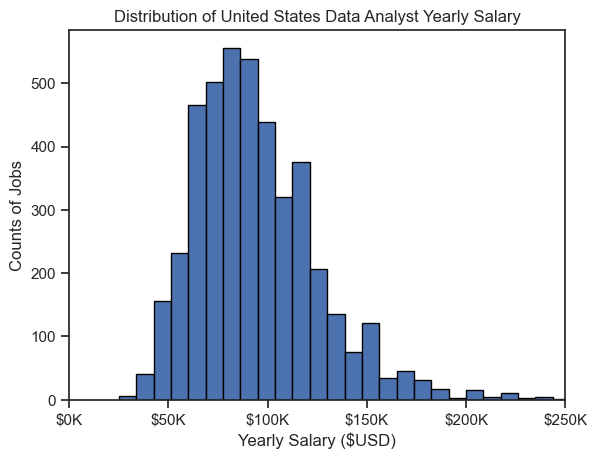

In [14]:
Df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')] 
Df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', ylabel='Counts of Jobs', xlabel='Yearly Salary ($USD)', 
                                 title='Distribution of United States Data Analyst Yearly Salary')
plt.xlim(0,250000)
#Format Salary form
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

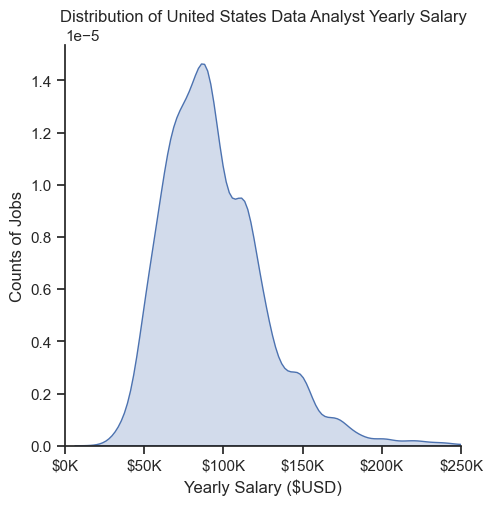

In [21]:
sns.displot(data=Df_DA_US['salary_year_avg'], kind='kde' ,fill=True)

# Df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black', ylabel='Counts of Jobs', xlabel='Yearly Salary ($USD)', title='Distribution of United States Data Analyst Yearly Salary')
plt.xlim(0,250000)
plt.ylabel('Counts of Jobs')
plt.xlabel('Yearly Salary ($USD)')
plt.title('Distribution of United States Data Analyst Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# kind='kde' is a smooth line kind='hist' normal histograme
# fill = True is filling the line

### BoxPlot

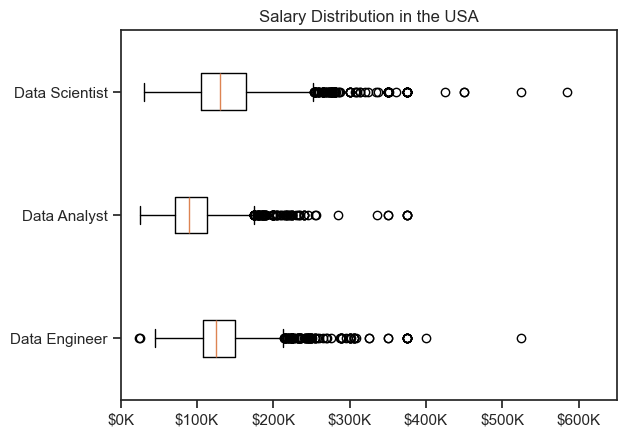

In [22]:
job_titles = ['Data Engineer','Data Analyst', 'Data Scientist']
Df_DA_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
Df_DA_US = Df_DA_US.dropna(subset=['salary_year_avg'])
job_list = [Df_DA_US[Df_DA_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, vert=False, tick_labels=job_titles)
plt.xlim(0, 650000)
plt.title('Salary Distribution in the USA')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

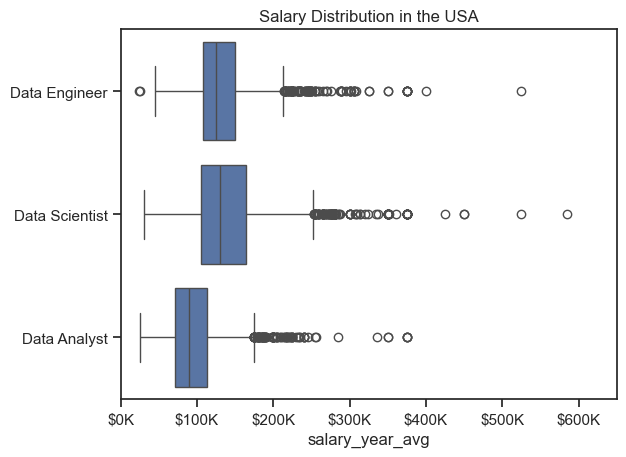

In [25]:
sns.boxplot(data=Df_DA_US, x='salary_year_avg', y='job_title_short')
# plt.boxplot(job_list, vert=False, tick_labels=job_titles)
plt.xlim(0, 650000)
plt.title('Salary Distribution in the USA')
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()